# Gaussian Mixture Models (高斯混合模型)

高斯混合模型（Gaussian mixture model，GMM）是常见的一种概率模型类统计学习方法，它通过样本的概率密度分布估计来解决数据样本的聚类问题。

下面按照 企鹅数据集 为例围绕高斯混合模型进行展开

In [24]:
import math
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
%matplotlib inline

In [25]:
penguins = sns.load_dataset("penguins")
penguins.head(n=5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [26]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [27]:
penguins = penguins.dropna()
penguins.head(n=5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [28]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


## 一元高斯分布

一元高斯分布是一种概率密度函数其分布情况如下图所示


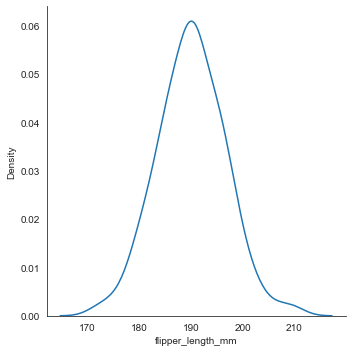

In [29]:
sns.displot(data=penguins.loc[penguins['species'] == 'Adelie'], x="flipper_length_mm", kind="kde")

一元高斯分布的概率密度函数如下所示

$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(y-\mu)^2}{2{\sigma}^2}}$

In [30]:
# 高斯分布函数的公式代码写法
def normal_distribution(x, mu, sigma):
    return np.exp(-1*((x-mu)**2)/(2*(sigma**2)))/(math.sqrt(2*np.pi) * sigma)

均值与标准

高斯分布重要量的性质
- 密度函数关于平均值对称
- 平均值是它的众数（statistical mode）以及中位数（median）
- 函数曲线下:
    - 68.268949%的面积在平均值左右的一个标准差范围内
    - 95.449974%的面积在平均值左右两个标准差2σ的范围内
    - 99.730020%的面积在平均值左右三个标准差3σ的范围内

影响高斯分布的两个参数的性质
- 均数用来描述曲线的位置
- 标准差用来描述曲线的形状
    - 标准差越大，说明观察资料越分散，靠近两边的观察值越多，峰值越低，曲线越低平

其对高斯分布的影响如下图所示

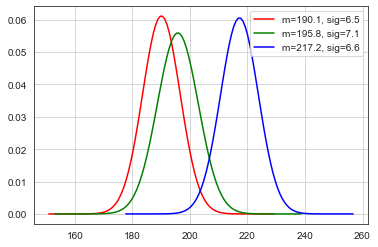

In [31]:
penguins_specie1 = penguins.loc[penguins['species'] == 'Adelie', "flipper_length_mm"]
mean1, sigma1 = penguins_specie1.mean(), penguins_specie1.std()
x1 = np.linspace(mean1 - 6*sigma1, mean1 + 6*sigma1, 100)

penguins_specie2 = penguins.loc[penguins['species'] == 'Chinstrap', "flipper_length_mm"]
mean2, sigma2 = penguins_specie2.mean(), penguins_specie2.std()
x2 = np.linspace(mean2 - 6*sigma2, mean2 + 6*sigma2, 100)

penguins_specie3 = penguins.loc[penguins['species'] == 'Gentoo', "flipper_length_mm"]
mean3, sigma3 = penguins_specie3.mean(), penguins_specie3.std()
x3 = np.linspace(mean3 - 6*sigma3, mean3 + 6*sigma3, 100)
 
y1 = normal_distribution(x1, mean1, sigma1)
y2 = normal_distribution(x2, mean2, sigma2)
y3 = normal_distribution(x3, mean3, sigma3)
 
plt.plot(x1, y1, 'r', label='m={:1.4}, sig={:1.2}'.format(mean1, sigma1))
plt.plot(x2, y2, 'g', label='m={:1.4}, sig={:1.2}'.format(mean2, sigma2))
plt.plot(x3, y3, 'b', label='m={:1.4}, sig={:1.2}'.format(mean3, sigma3))
plt.legend()
plt.grid()
plt.show()

给定一组数据如何拟合一个比较好的高斯分布？

In [32]:
class UnivariateGaussian:
    "Univariate Gaussian Model"
    # mean and standard deviation
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

    # probability density function
    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (math.sqrt(2 * np.pi) * abs(self.sigma))) * math.exp(-u * u / 2)
        return y

    # printing model values
    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)

In [33]:
#gaussian of best fit
best_single = UnivariateGaussian(np.mean(penguins['flipper_length_mm']), np.std(penguins['flipper_length_mm']))
best_single.mu, best_single.sigma
print('Best single Gaussian: μ = {}, σ = {}'.format(best_single.mu, best_single.sigma))

Best single Gaussian: μ = 200.96696696696696, σ = 13.994704772576716


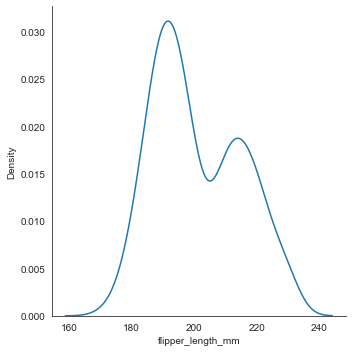

In [34]:
sns.displot(data=penguins, x="flipper_length_mm", kind="kde")

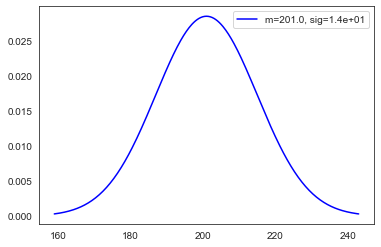

In [35]:
x = np.linspace(best_single.mu - 3*best_single.sigma, best_single.mu + 3*best_single.sigma, penguins.shape[0])
y = normal_distribution(x, best_single.mu, best_single.sigma)
plt.plot(x, y, 'b', label='m={:1.4}, sig={:1.2}'.format(best_single.mu, best_single.sigma))
plt.legend()
plt.show()

__主要用途__

数据异常值检测（降噪）：依达拉准则（$3\sigma$准则）

## 一元高斯混合分布

一元高斯混合分布由K个一元高斯分布进行线性叠加得到其分布情况如下图所示

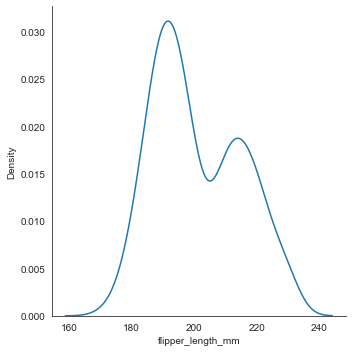

In [36]:
sns.displot(data=penguins, x="flipper_length_mm", kind="kde")

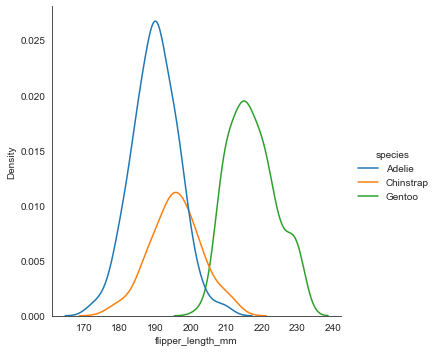

In [37]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

一元高斯混合分布概率密度函数如下所示

$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(y-\mu)^2}{2{\sigma}^2}}$

$p(x|\theta(\boldsymbol{w}, \boldsymbol{\mu}, \boldsymbol{\sigma}^2)) = \sum_{i=1}^k{w_i}p(x|\mu_i, \sigma_i^2)$
   s.t. $\sum_{i=1}^k{w_i}=1$

上式表示：

有这么一组数 $x \in \boldsymbol{X}$ 是由 k 个一元高斯分布函数 $\displaystyle{\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\sigma}^2), \quad \boldsymbol{\mu} = (\mu_1, \mu_2, ..., \mu_k), \quad \boldsymbol{\sigma} = (\sigma_1, \sigma_2, ..., \sigma_k)}$，然后这些高斯各自以一定 $\boldsymbol{w} = (w_1, w_2, ..., w_k)$ 比例混合生成的

给定一组数据如何判断其属于几个高斯分布混合而成？

In [55]:
class UnivariateGaussianMixture:
    "Univariate Gaussians Mixture Model with EM estimation (three Guassian)"

    def __init__(self, data, sigma_min=6, sigma_max=7):
        self.data = data
        self.mu_min = min(data)
        self.mu_max = max(data)

        # init with multiple gaussians
        self.one = UnivariateGaussian(random.uniform(self.mu_min, self.mu_max), random.uniform(sigma_min, sigma_max))
        self.two = UnivariateGaussian(random.uniform(self.mu_min, self.mu_max), random.uniform(sigma_min, sigma_max))
        self.three = UnivariateGaussian(random.uniform(self.mu_min, self.mu_max), random.uniform(sigma_min, sigma_max))
        # as well as how much to mix them
        self.mix1 = 0.2
        self.mix2 = 0.4
        self.mix3 = 0.4

    def Estep(self):
        "Perform an E(stimation)-step, freshening up self.loglike in the process"
        # compute weights
        self.loglike = 0. # = log(p = 1)
        for datum in self.data:
            # unnormalized weights
            wp1 = self.one.pdf(datum) * self.mix1
            wp2 = self.two.pdf(datum) * self.mix2
            wp3 = self.three.pdf(datum) * self.mix3
            # compute denominator
            den = wp1 + wp2 + wp3
            # normalize
            wp1 /= den
            wp2 /= den
            wp3 /= den
            # add into loglike
            self.loglike += math.log(wp1 + wp2 + wp3)
            yield (wp1, wp2, wp3)

    def Mstep(self, weights):
        "Perform an M(aximization)-step"
        # compute denominators
        (left, center, right) = zip(*weights)
        one_den = sum(left)
        two_den = sum(center)
        three_den = sum(right)
        # compute new means
        self.one.mu = sum(w * d / one_den for (w, d) in zip(left, self.data))
        self.two.mu = sum(w * d / two_den for (w, d) in zip(center, self.data))
        self.three.mu = sum(w * d / three_den for (w, d) in zip(right, self.data))
        # compute new sigmas
        self.one.sigma = math.sqrt(sum(w * ((d - self.one.mu) ** 2) for (w, d) in zip(left, self.data)) / one_den)
        self.two.sigma = math.sqrt(sum(w * ((d - self.two.mu) ** 2) for (w, d) in zip(center, self.data)) / two_den)
        self.three.sigma = math.sqrt(sum(w * ((d - self.three.mu) ** 2) for (w, d) in zip(right, self.data)) / two_den)
        # compute new mix
        self.mix1 = one_den / len(self.data)
        self.mix2 = two_den / len(self.data)
        self.mix3 = three_den / len(self.data)

    def pdf(self, x):
        return self.mix1 * self.one.pdf(x) + self.mix2 * self.two.pdf(x) + self.mix3 * self.three.pdf(x)

    def train(self, _, verbose=False):
        print(f"Perform {_} iterations, then compute log-likelihood")
        self.Mstep(self.Estep())

    def __repr__(self):
        return 'UnivariateGaussianMixture({0}, {1}, {2}, mix=({} + {} + {}))'.format(self.one, self.two, self.three, self.mix1, self.mix2, self.mix3)

    def __str__(self):
        return 'Mixture: {}, {}, {}, mix=({} + {} + {}))'.format(self.one, self.two, self.three, self.mix1, self.mix2, self.mix3)

In [56]:
# Check out the fitting process
n_iterations = 40
best_mix = None
best_loglike = float('-inf')
mix = UnivariateGaussianMixture(penguins['flipper_length_mm'].values)
for _ in range(n_iterations):
    try:
        # train!
        mix.train(_, verbose=True)
        if mix.loglike > best_loglike:
            best_loglike = mix.loglike
            best_mix = mix
        print(f"{'='*60}")
        print(mix)
        print(f"{'='*60}")
    except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
        pass

Perform 0 iterations, then compute log-likelihood
Mixture: Gaussian(187.629, 6.6671), Gaussian(192.331, 6.30357), Gaussian(216.84, 5.75075), mix=(0.12227785395491357 + 0.5019050129610934 + 0.3758171330839926))
Perform 1 iterations, then compute log-likelihood
Mixture: Gaussian(187.593, 6.69389), Gaussian(192.384, 6.38999), Gaussian(216.768, 5.85004), mix=(0.12233247546299478 + 0.5016526702543731 + 0.376014854282632))
Perform 2 iterations, then compute log-likelihood
Mixture: Gaussian(187.602, 6.65584), Gaussian(192.392, 6.4206), Gaussian(216.757, 5.86732), mix=(0.1223396139121645 + 0.5016615346529106 + 0.37599885143492506))
Perform 3 iterations, then compute log-likelihood
Mixture: Gaussian(187.615, 6.61799), Gaussian(192.394, 6.44027), Gaussian(216.757, 5.86821), mix=(0.12234649378454146 + 0.5017800153504468 + 0.375873490865012))
Perform 4 iterations, then compute log-likelihood
Mixture: Gaussian(187.627, 6.58697), Gaussian(192.397, 6.45663), Gaussian(216.761, 5.86474), mix=(0.1223537

## 多元高斯分布

多元高斯分布是一元高斯分布函数的拓展, 其公式定义为：

$N(x|\mu, \Sigma) = \frac{1}{(2\pi)^{\frac{d}{2}}}\exp\left( -\frac{1}{2}(x-\mu)^{T}\Sigma^{-1}(x-\mu) \right)$

$\displaystyle{\boldsymbol{\mu}}$ 是元素的均值向量，$\Sigma$ 是元素间的协方差矩阵，$d$ 是属性维度

In [40]:
def MultivariateGaussian(D=2, X=1000, mu=0, sigma=1):
    '''
    Parameters
    ----------
    D 维度
    X 样本数
    mu 样本均值
    sigma: 样本方差
    
    Returns
    -------
    data  shape(X, D), X 个 D 维服从高斯分布的样本
    Gaussian  高斯分布概率密度函数
    '''
    mean = np.zeros(D) + mu  # 均值矩阵，每个维度的均值都为 m
    cov = np.eye(D) * sigma  # 协方差矩阵，每个维度的方差都为 sigma

    # 产生 N 维高斯分布数据
    data = np.random.multivariate_normal(mean, cov, X)
    # N 维数据高斯分布概率密度函数
    Gaussian = stats.multivariate_normal(mean=mean, cov=cov)
    
    return data, Gaussian

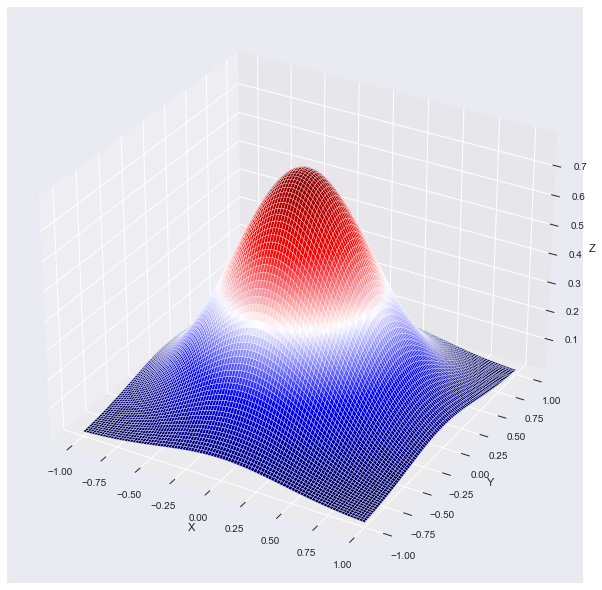

In [68]:
M = 100
data, Gaussian = MultivariateGaussian(D=2, X=M, mu=0, sigma=0.2)
# 生成二维网格平面
X, Y = np.meshgrid(np.linspace(-1, 1, M), np.linspace(-1, 1, M))
# 二维坐标数据
d = np.dstack([X, Y])
# 计算二维联合高斯概率
Z = Gaussian.pdf(d).reshape(M, M)

plt.style.use('seaborn')
'''二元高斯概率分布图'''
fig = plt.figure(figsize=(16, 8))
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='seismic')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## 多元高斯混合模型

多元高斯混合模型假设数据中存在一定数量的多元高斯分布，这些多元高斯模型通过线性的方式进行组合。

> __多个多元高斯分布函数的线性组合，理论上GMM可以拟合出任意类型的分布。__

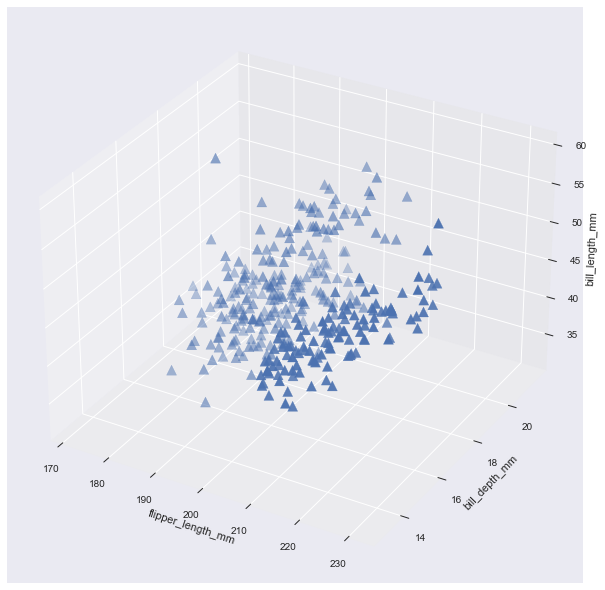

In [77]:
'''多元高斯混合概率分布图'''
plt.style.use('seaborn')
fig = plt.figure(figsize=(16, 8))
ax = Axes3D(fig)
ax.scatter(penguins['flipper_length_mm'], penguins["bill_depth_mm"], penguins["bill_length_mm"], marker="^", s=100)
ax.set_xlabel('flipper_length_mm')
ax.set_ylabel('bill_depth_mm')
ax.set_zlabel('bill_length_mm')
plt.show()

In [ ]:
class MultivariateGaussianMixture:
    "Multivariate Gaussians Mixture Model with EM estimation"

    def __init__(self, data, C=3, max_iter=100, restarts=30):
        '''
        Starts with random initialization *restarts* times
        Runs optimization until saturation with *rtol* reached
        or *max_iter* iterations were made.
        X: (N, d), data points
        C: int, number of clusters
        '''
        self.N = X.shape[0]  # number of objects
        self.d = X.shape[1]  # dimension of each object
        self.C = C # number of clusters
        self.best_loss = None
        self.best_pi = None
        self.best_mu = None
        self.best_sigma = None
        self.pis = {}
        self.mus = {}
        self.sigmas = {}
        self.losses = {}
        self.max_iter = max_iter
        self.restarts = restarts
    
    def E_step(X, pi, mu, sigma):
        """
        Performs E-step on GMM model
        Each input is numpy array:
        X: (N x d), data points
        pi: (C), mixture component weights
        mu: (C x d), mixture component means
        sigma: (C x d x d), mixture component covariance matrices
        Returns:
        gamma: (N x C), probabilities of clusters for objects
        """
        N = X.shape[0]  # number of objects
        C = pi.shape[0]  # number of clusters
        d = mu.shape[1]  # dimension of each object
        gamma = np.zeros((N, C))  # distribution q(T)
        for i in range(C):
            gamma[:, i] = pi[i] * scipy.stats.multivariate_normal(mean=mu[i], cov=sigma[i]).pdf(X)
        for n in range(N):
            z = np.sum(gamma[n, :])
            gamma[n, :] = gamma[n, :] / (z)
        return gamma

    def M_step(X, gamma):
        """
        Performs M-step on GMM model
        Each input is numpy array:
        X: (N x d), data points
        gamma: (N x C), distribution q(T)
        Returns:
        pi: (C)
        mu: (C x d)
        sigma: (C x d x d)
        """
        N = X.shape[0]  # number of objects
        C = gamma.shape[1]  # number of clusters
        d = X.shape[1]  # dimension of each object
        mu = []
        sigma = []
        pi = []
        reg_cov = 1e-6 * np.identity(len(X[0]))
        for i in range(C):
            r_x = np.sum(X * gamma[:, i].reshape(len(X), 1), axis=0)
            r_i = sum(gamma[:, i])
            mu.append(r_x / r_i)
            s = ((1 / r_i) * np.dot((np.array(gamma[:, i]).reshape(len(X), 1) * (X - mu[i])).T, (X - mu[i]))) + reg_cov
            sigma.append(s)
            pi.append(r_i / np.sum(gamma))
        return np.array(pi), np.array(mu), np.array(sigma)

    def compute_vlb(X, pi, mu, sigma, gamma):
        """
        Each input is numpy array:
        X: (N x d), data points
        gamma: (N x C), distribution q(T)
        pi: (C)
        mu: (C x d)
        sigma: (C x d x d)
        Returns value of variational lower bound
        """
        N = X.shape[0]  # number of objects
        C = gamma.shape[1]  # number of clusters
        d = X.shape[1]  # dimension of each object

        L1 = []
        L2 = []

        for i in range(X.shape[0]):
            for j in range(C):
                Norm=scipy.stats.multivariate_normal(mean=mu[j], cov=sigma[j]).pdf(X)
                if np.logical_and(np.isnan(Norm[i])==False,np.isinf(Norm[i])==False):
                    if Norm[i] >0:
                        L1.append(gamma[i, j] * (np.log(pi[j]) + np.log(Norm[i])))
                    if gamma[i, j]>0:
                        L2.append((gamma[i, j] * np.log(gamma[i, j])))
        L1 = np.array(L1)
        L2 = np.array(L2)
        L1 = L1[~np.isnan(L1)]
        L2 = L2[~np.isnan(L2)]
        loss = np.sum(L1) - np.sum(L2)

        return loss

    def create_mean():
        mean=np.random.randint(min(X[:, 0]), max(X[:, 0]), size=(3, len(X[0])))
        return mean

    def create_sigma():
        I = np.diag((1, 1))
        sigma_1 = [I, I, I]
        sigma_1 = np.array(sigma_1)
        return sigma_1

    def create_pi():
        a = []
        pi_1 = []
        for i in range(3):
            a.append(random.randint(1, 10))
        z = sum(a)
        for x in range(3):
            pi_1.append(a[x] / z)
        return np.array(pi_1)

    def Best_config(loses, pis0, mus0, sigmas0):
        best_config=[]
        for key, value in loses.items():
            max_val = max(list(loses.values()))
            if value == max_val:
                return loses[key],pis0[key],mus0[key],sigmas0[key]

    def train(self):
        for _ in range(restarts):
            try:
                ### creating parameters
                mu=create_mean()
                sigma=create_sigma()
                pi=create_pi()

                ### The Functions
                Stop_point = False
                loss=1
                for ind in range(max_iter):
                    if Stop_point ==False:
                        if np.logical_and(np.isnan(mu).any() == False, np.isinf(mu).any() == False):
                            if np.logical_and(np.isnan(sigma).any() == False, np.isinf(sigma).any() == False):
                                gamma = E_step(X, pi, mu, sigma)
                                pi, mu, sigma = M_step(X, gamma)
                                if ind>0 and rtol >= np.abs((compute_vlb(X, pi, mu, sigma, gamma)-loss) / loss):
                                    Stop_point =True
                                else:
                                    loss = compute_vlb(X, pi, mu, sigma, gamma)
                    else:
                        break
                losses[_]=loss
                pis[_]=pi
                mus[_]=mu
                sigmas[_]=sigma

            except Exception:
                    print("array must not contain infs or NaNs")
                    pass
        
        best_loss, best_pi, best_mu, best_sigma = Best_config(losses,pis,mus,sigmas)

        return best_loss, best_pi, best_mu, best_sigma

In [ ]:
MGMM = MultivariateGaussianMixture(penguins.iloc[:, 2:-1], 3)

best_loss, best_pi, best_mu, best_sigma = train_EM(X, 3)

colors = np.array([(31, 119, 180), (255, 127, 14), (44, 160, 44)]) / 255.
plt.scatter(X[:, 0], X[:, 1], c=colors[labels], s=30)
plt.axis('equal')
plt.show()

array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs


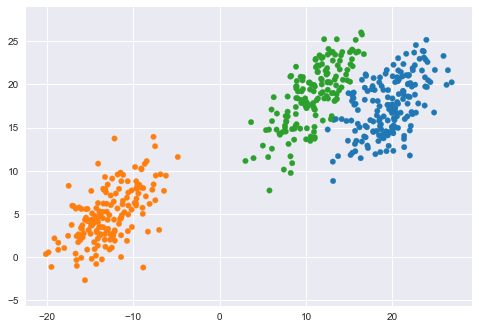

In [82]:

import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.stats import norm
from sklearn.datasets.samples_generator import make_blobs

#seed data for reconstruction
np.random.seed(0)

#create data
X,Y = make_blobs(cluster_std=1.5,random_state=20,n_samples=500,centers=3)
# strech data to ellipsoid
X = np.dot(X,np.random.RandomState(0).randn(2,2))

# plt.scatter(X[:, 0], X[:, 1], c='grey', s=30)
# plt.axis('equal')
# plt.show()


import scipy

def E_step(X, pi, mu, sigma):
    """
    Performs E-step on GMM model
    Each input is numpy array:
    X: (N x d), data points
    pi: (C), mixture component weights
    mu: (C x d), mixture component means
    sigma: (C x d x d), mixture component covariance matrices

    Returns:
    gamma: (N x C), probabilities of clusters for objects
    """
    N = X.shape[0]  # number of objects
    C = pi.shape[0]  # number of clusters
    d = mu.shape[1]  # dimension of each object
    gamma = np.zeros((N, C))  # distribution q(T)
    for i in range(C):
        gamma[:, i] = pi[i] * scipy.stats.multivariate_normal(mean=mu[i], cov=sigma[i]).pdf(X)
    for n in range(N):
        z = np.sum(gamma[n, :])
        gamma[n, :] = gamma[n, :] / (z)

    return gamma

#gamma = E_step(X, pi0, mu0, sigma0)

def M_step(X, gamma):
    """
    Performs M-step on GMM model
    Each input is numpy array:
    X: (N x d), data points
    gamma: (N x C), distribution q(T)

    Returns:
    pi: (C)
    mu: (C x d)
    sigma: (C x d x d)
    """
    N = X.shape[0]  # number of objects
    C = gamma.shape[1]  # number of clusters
    d = X.shape[1]  # dimension of each object


    mu = []
    sigma = []
    pi = []
    reg_cov = 1e-6 * np.identity(len(X[0]))
    for i in range(C):
        r_x = np.sum(X * gamma[:, i].reshape(len(X), 1), axis=0)
        r_i = sum(gamma[:, i])
        mu.append(r_x / r_i)
        s = ((1 / r_i) * np.dot((np.array(gamma[:, i]).reshape(len(X), 1) * (X - mu[i])).T, (X - mu[i]))) + reg_cov
        sigma.append(s)
        pi.append(r_i / np.sum(gamma))
    return np.array(pi), np.array(mu), np.array(sigma)

#pi, mu, sigma = M_step(X, gamma)


def compute_vlb(X, pi, mu, sigma, gamma):
    """
    Each input is numpy array:
    X: (N x d), data points
    gamma: (N x C), distribution q(T)
    pi: (C)
    mu: (C x d)
    sigma: (C x d x d)

    Returns value of variational lower bound
    """
    N = X.shape[0]  # number of objects
    C = gamma.shape[1]  # number of clusters
    d = X.shape[1]  # dimension of each object

    L1 = []
    L2 = []

    for i in range(X.shape[0]):
        for j in range(C):
            Norm=scipy.stats.multivariate_normal(mean=mu[j], cov=sigma[j]).pdf(X)
            if np.logical_and(np.isnan(Norm[i])==False,np.isinf(Norm[i])==False):
                if Norm[i] >0:
                    L1.append(gamma[i, j] * (np.log(pi[j]) + np.log(Norm[i])))
                if gamma[i, j]>0:
                    L2.append((gamma[i, j] * np.log(gamma[i, j])))
    L1 = np.array(L1)
    L2 = np.array(L2)
    L1 = L1[~np.isnan(L1)]
    L2 = L2[~np.isnan(L2)]
    loss = np.sum(L1) - np.sum(L2)

    return loss

#loss = compute_vlb(X, pi, mu, sigma, gamma)


def create_mean():
    mean=np.random.randint(min(X[:, 0]), max(X[:, 0]), size=(3, len(X[0])))
    return mean


def create_sigma():
    I = np.diag((1, 1))
    sigma_1 = [I, I, I]
    sigma_1 = np.array(sigma_1)
    return sigma_1

def create_pi():
    a = []
    pi_1 = []
    for i in range(3):
        a.append(random.randint(1, 10))
    z = sum(a)
    for x in range(3):
        pi_1.append(a[x] / z)
    return np.array(pi_1)

def Best_config(loses,pis0,mus0,sigmas0):
    best_config=[]
    for key, value in loses.items():
        max_val = max(list(loses.values()))
        if value == max_val:
            return loses[key],pis0[key],mus0[key],sigmas0[key]


def train_EM(X, C, rtol=1e-3, max_iter=100, restarts=30):
    '''
    Starts with random initialization *restarts* times
    Runs optimization until saturation with *rtol* reached
    or *max_iter* iterations were made.

    X: (N, d), data points
    C: int, number of clusters
    '''
    N = X.shape[0]  # number of objects
    d = X.shape[1]  # dimension of each object
    best_loss = None
    best_pi = None
    best_mu = None
    best_sigma = None
    pis = {}
    mus = {}
    sigmas = {}
    losses={}

    for _ in range(restarts):
        try:
            ### creating parameters
            mu=create_mean()
            sigma=create_sigma()
            pi=create_pi()

            ### The Functions
            Stop_point = False
            loss=1
            for ind in range(max_iter):
                if Stop_point ==False:
                    if np.logical_and(np.isnan(mu).any() == False, np.isinf(mu).any() == False):
                        if np.logical_and(np.isnan(sigma).any() == False, np.isinf(sigma).any() == False):
                            gamma = E_step(X, pi, mu, sigma)
                            pi, mu, sigma = M_step(X, gamma)
                            if ind>0 and rtol >= np.abs((compute_vlb(X, pi, mu, sigma, gamma)-loss) / loss):
                                Stop_point =True
                            else:
                                loss = compute_vlb(X, pi, mu, sigma, gamma)
                else:
                    break
            losses[_]=loss
            pis[_]=pi
            mus[_]=mu
            sigmas[_]=sigma

        except Exception:
                print("array must not contain infs or NaNs")
                pass
    best_loss, best_pi, best_mu, best_sigma=Best_config(losses,pis,mus,sigmas)

    return best_loss, best_pi, best_mu, best_sigma

best_loss, best_pi, best_mu, best_sigma = train_EM(X, 3)

gamma = E_step(X, best_pi, best_mu, best_sigma)
labels = gamma.argmax(axis=1)
colors = np.array([(31, 119, 180), (255, 127, 14), (44, 160, 44)]) / 255.
plt.scatter(X[:, 0], X[:, 1], c=colors[labels], s=30)
plt.axis('equal')
plt.show()

In [85]:
penguins.iloc[:, 2:-1].mean()

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64